# Sequence of my code is as follow:
## A) Reading Data
## B) Preprocessing:
   #### 1) Check correlation between features and output
   #### 2) Choosing the top correlated features
   #### 3) Handling missing data
   #### 4) Outliers
   #### 5) Data normalization
## C) Choosing regression technique

# importing required libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# reading data

In [74]:
houses_data = pd.read_csv("house_train.csv")
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
numerical_features = houses_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = houses_data.select_dtypes(include=['object']).columns

In [77]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [78]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Correlation check and choosing the most correlated features


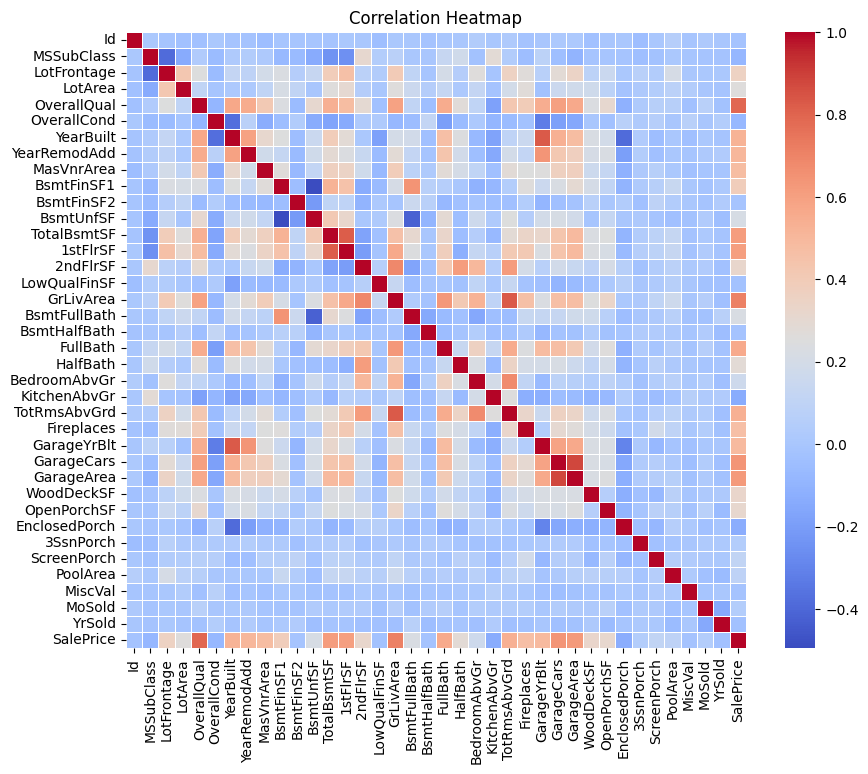

In [79]:
# heat map
correlation_matrix = houses_data[numerical_features].corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


<Axes: >

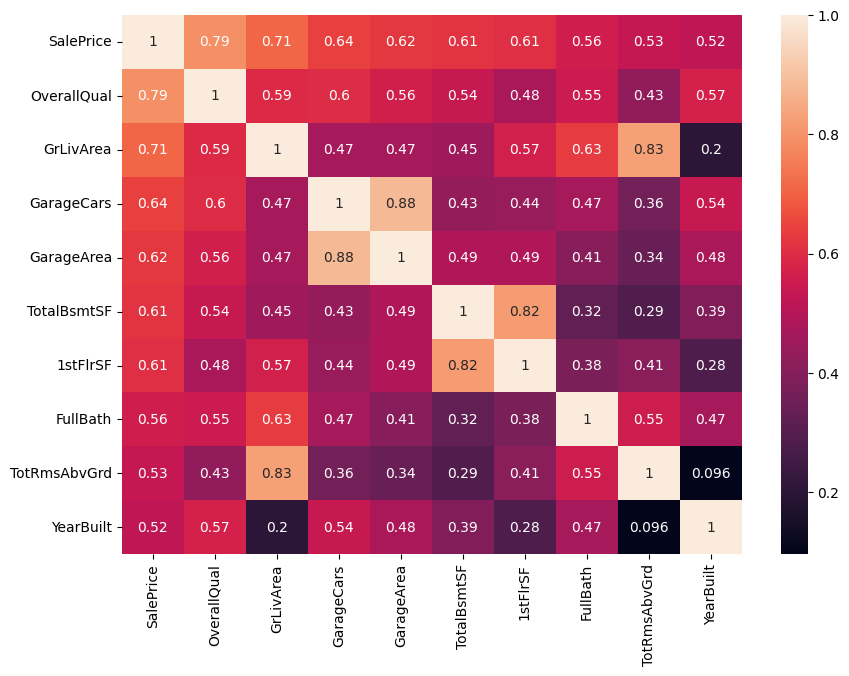

In [81]:
"""Correlation coefficient values below 0.3 are considered to be weak; 0.3-0.7 are moderate; >0.7 are strong"""
#cols of features that most correlated to SalePrice
numerical_cols = correlation_matrix.nlargest(10,"SalePrice")["SalePrice"].index
print(numerical_cols)
#additional step
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(houses_data[numerical_cols].corr(),annot = True)

#### Categorical features

In [82]:
label_encoder = LabelEncoder()
for feature in categorical_features:
    houses_data[feature] = label_encoder.fit_transform(houses_data[feature].astype(str))
    
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [83]:
from sklearn.feature_selection import chi2

In [84]:
chi2_stats, chi2_p_values = chi2(houses_data[categorical_features], houses_data['SalePrice'])
chi2_stats

array([ 113.80313867,    3.65060135,   44.73267053,  802.97289658,
        124.3573792 ,  242.33333333,  564.63363013,  889.79378127,
       2194.26710607,  212.61628904,   27.3364812 , 1951.47824504,
        812.88771965,  356.0536148 ,  229.02974032,  696.02590616,
        808.61992535,  270.17448927,  209.77723733,   87.76959648,
        302.33339208,  367.69802576,  108.80084957,  466.5964564 ,
        836.37773825,  118.15907697,   67.6132408 , 1483.14492517,
         53.80233492,  213.59427466,  303.82378017,   97.51975439,
        433.65371868, 1264.92986578,  600.01019103,   66.57243192,
         46.51399683,   93.28925542,    4.18733575,  197.35302481,
         26.6863028 ,  187.47040404,  212.58657769])

In [85]:
chi2_p_values

array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.32609803e-004,
       1.00000000e+000, 1.00000000e+000, 9.97453183e-001, 6.85967589e-009,
       3.24230812e-163, 1.00000000e+000, 1.00000000e+000, 2.81882006e-127,
       5.09679779e-005, 1.00000000e+000, 1.00000000e+000, 1.74172359e-001,
       7.73611767e-005, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 9.99999999e-001,
       4.40944951e-006, 1.00000000e+000, 1.00000000e+000, 7.83157898e-065,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 3.41931766e-040, 9.59197485e-001, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000])

In [86]:
significant_chi2_features = [feature for feature, p_value in zip(categorical_features, chi2_p_values) if p_value < 0.05]

significant_chi2_features

['LotShape',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'Exterior2nd',
 'BsmtFinType1',
 'HeatingQC',
 'GarageType']

In [91]:
numerical_cols.to_list()

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [93]:
best_filtered_features = []
best_filtered_features.extend(significant_chi2_features)
best_filtered_features.extend(numerical_cols.to_list())
best_filtered_features

['LotShape',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'Exterior2nd',
 'BsmtFinType1',
 'HeatingQC',
 'GarageType',
 'SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [95]:
houses_data = houses_data[best_filtered_features]

# Missing Data

In [97]:
#houses_data = houses_data.drop(["Id"],axis = 1) #drop id since it just counter
isnull_df = pd.DataFrame(houses_data.isna().sum().sort_values(ascending = False),columns = ["null_sum"])
isnull_df.head(20)

,null_sum
LotShape,0
OverallQual,0
TotRmsAbvGrd,0
FullBath,0
1stFlrSF,0
TotalBsmtSF,0
GarageArea,0
GarageCars,0
GrLivArea,0
SalePrice,0


In [98]:
#I will drop any columns has nulls
drop_cols_nul = isnull_df.index[isnull_df["null_sum"].values > 1]
houses_data.drop(drop_cols_nul,axis = 1,inplace = True)

In [99]:
houses_data

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,0,5,0,5,13,2,0,1,208500,7,1710,2,548,856,856,2,8,2003
1,3,0,24,0,2,8,0,0,1,181500,6,1262,2,460,1262,1262,2,6,1976
2,0,0,5,0,5,13,2,0,1,223500,7,1786,2,608,920,920,2,6,2001
3,0,0,6,0,5,15,0,2,5,140000,7,1717,3,642,756,961,1,7,1915
4,0,0,15,0,5,13,2,0,1,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,8,0,5,13,5,0,1,175000,6,1647,2,460,953,953,2,7,1999
1456,3,0,14,0,2,10,0,4,1,210000,6,2073,2,500,1542,2073,2,7,1978
1457,3,0,6,0,5,5,2,0,1,266500,7,2340,1,252,1152,1188,2,9,1941
1458,3,0,12,0,2,8,2,2,1,142125,5,1078,1,240,1078,1078,1,5,1950


In [100]:
houses_data.dropna(inplace = True)

In [111]:
houses_data

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,0,5,0,5,13,2,0,1,208500,7,1710,2,548,856,856,2,8,2003
1,3,0,24,0,2,8,0,0,1,181500,6,1262,2,460,1262,1262,2,6,1976
2,0,0,5,0,5,13,2,0,1,223500,7,1786,2,608,920,920,2,6,2001
3,0,0,6,0,5,15,0,2,5,140000,7,1717,3,642,756,961,1,7,1915
4,0,0,15,0,5,13,2,0,1,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,8,0,5,13,5,0,1,175000,6,1647,2,460,953,953,2,7,1999
1456,3,0,14,0,2,10,0,4,1,210000,6,2073,2,500,1542,2073,2,7,1978
1457,3,0,6,0,5,5,2,0,1,266500,7,2340,1,252,1152,1188,2,9,1941
1458,3,0,12,0,2,8,2,2,1,142125,5,1078,1,240,1078,1078,1,5,1950


In [112]:
for i in best_filtered_features:
    if i  not in houses_data.columns.values:
        print("problem")
houses_data.isna().sum().values.sum()


0

In [114]:
houses_data.shape

(1460, 19)

# Outliers

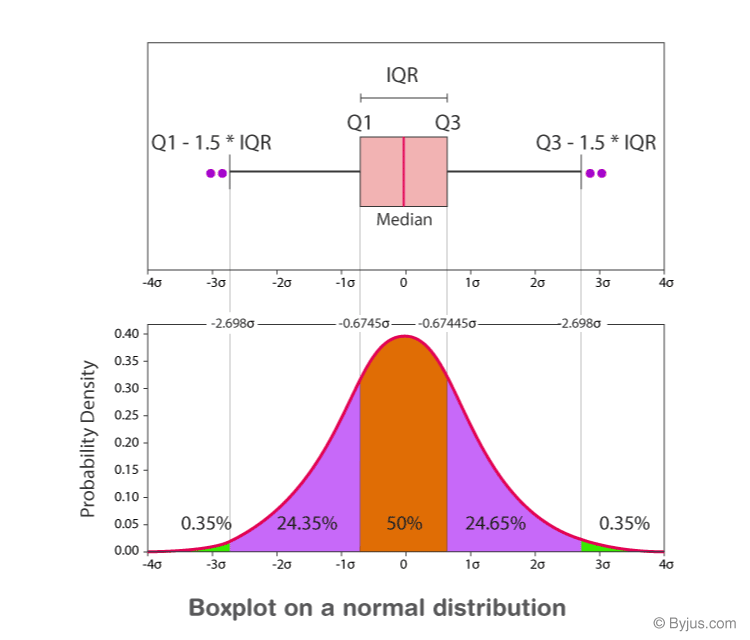

<Axes: ylabel='SalePrice'>

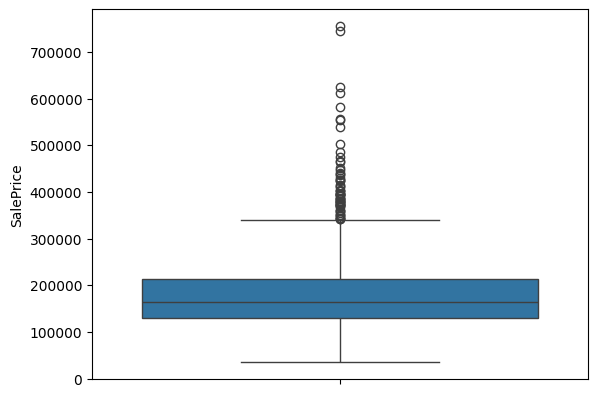

In [115]:
sns.boxplot(houses_data["SalePrice"])

In [116]:
numerical_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [117]:
import numpy as np

# Initialize empty lists to store indices of outliers
up_lst = []
low_lst = []

# Iterate over each column in 'cols'
for i in numerical_cols:
    # Print the current column name
    print(i)
    
    # Calculate the first quartile (25th percentile) of the column
    Q1 = np.percentile(houses_data[i], 25, interpolation='midpoint')
    
    # Calculate the third quartile (75th percentile) of the column
    Q3 = np.percentile(houses_data[i], 75, interpolation='midpoint')
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Identify outlier indices for values above the upper bound
    # Upper bound is defined as Q3 + 1.5 * IQR
    upper = np.where(houses_data[i] >= (Q3 + 1.5 * IQR))
    print("upper", upper)
    
    # Identify outlier indices for values below the lower bound
    # Lower bound is defined as Q1 - 1.5 * IQR
    lower = np.where(houses_data[i] <= (Q1 - 1.5 * IQR))
    print("lower =", lower)
    
    ''' Removing the Outliers '''
    # Add unique outlier indices above the upper bound to 'up_lst'
    for j in range(len(upper[0])):
        if not (upper[0][j] in up_lst):
            up_lst.append(upper[0][j])
    
    # Add unique outlier indices below the lower bound to 'low_lst'
    for k in range(len(lower[0])):
        if not (lower[0][k] in low_lst):
            low_lst.append(lower[0][k])


SalePrice
upper (array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1388, 1437], dtype=int64),)
lower = (array([], dtype=int64),)
OverallQual
upper (array([  58,  185,  224,  389,  440,  515,  523,  583,  591,  691,  825,
        994, 1169, 1182, 1243, 1298, 1373, 1442], dtype=int64),)
lower = (array([ 375,  533,  636,  916, 1100], dtype=int64),)
GrLivArea
upper (array([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
        635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
       1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386], dtype=int64),)
lower = (array([], dtype=int64),)
GarageCars
upper (array([ 420,  

In [118]:
up_arr = np.array(up_lst)
low_arr = np.array(low_lst)
print("up arr {}".format(up_arr.shape))
print("low arr {}".format(low_arr.shape))
out_lier_rows = np.append(low_arr,up_arr)
print("out_lier_rows {}".format(out_lier_rows.shape))
out_lier_rows = np.unique(out_lier_rows)

up arr (144,)
low arr (50,)
out_lier_rows (194,)


In [119]:
out_lier_rows.shape

(189,)

In [120]:
out_lier_rows = list(out_lier_rows)
training_data = houses_data[best_filtered_features]
training_data.head()

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,0,5,0,5,13,2,0,1,208500,7,1710,2,548,856,856,2,8,2003
1,3,0,24,0,2,8,0,0,1,181500,6,1262,2,460,1262,1262,2,6,1976
2,0,0,5,0,5,13,2,0,1,223500,7,1786,2,608,920,920,2,6,2001
3,0,0,6,0,5,15,0,2,5,140000,7,1717,3,642,756,961,1,7,1915
4,0,0,15,0,5,13,2,0,1,250000,8,2198,3,836,1145,1145,2,9,2000


In [121]:
training_data.shape

(1460, 19)

In [122]:
train_data = training_data.drop(out_lier_rows,axis = 0)

train_data.shape

(1271, 19)

In [123]:
train_data.head()

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,0,5,0,5,13,2,0,1,208500,7,1710,2,548,856,856,2,8,2003
1,3,0,24,0,2,8,0,0,1,181500,6,1262,2,460,1262,1262,2,6,1976
2,0,0,5,0,5,13,2,0,1,223500,7,1786,2,608,920,920,2,6,2001
3,0,0,6,0,5,15,0,2,5,140000,7,1717,3,642,756,961,1,7,1915
4,0,0,15,0,5,13,2,0,1,250000,8,2198,3,836,1145,1145,2,9,2000


<Axes: ylabel='SalePrice'>

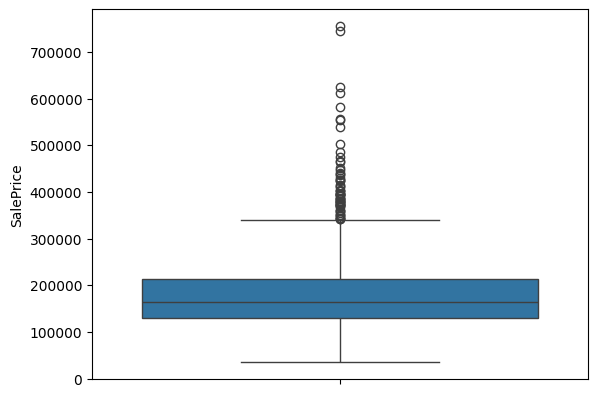

In [124]:
sns.boxplot(houses_data["SalePrice"])

<Axes: ylabel='SalePrice'>

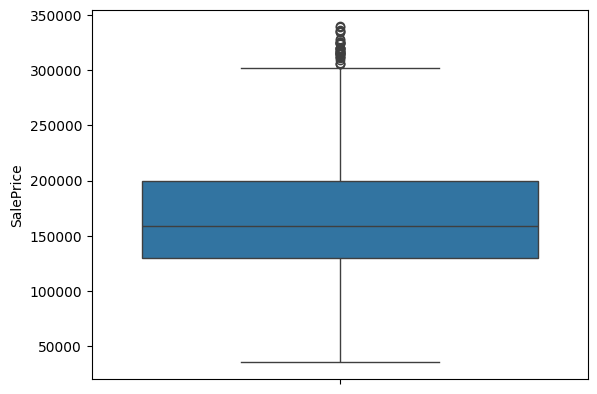

In [125]:
sns.boxplot(train_data["SalePrice"])

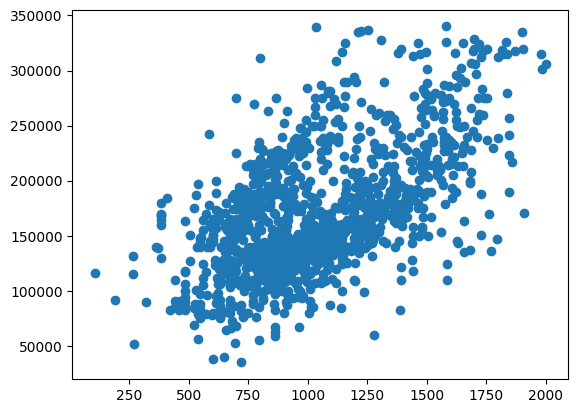

In [126]:
# without outlier
plt.scatter( train_data["TotalBsmtSF"], train_data["SalePrice"])

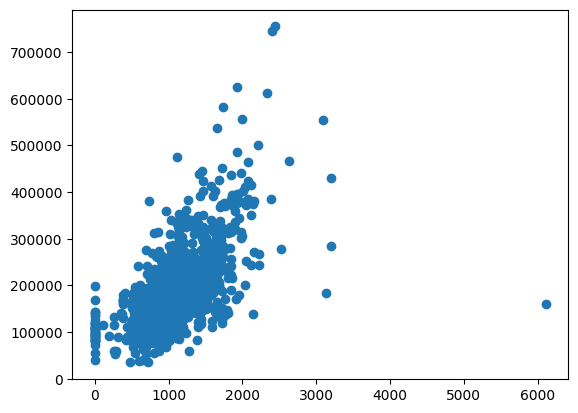

In [127]:
# with outlier
plt.scatter( houses_data["TotalBsmtSF"], houses_data["SalePrice"])

# Data Normalization

many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

`z = (x - u) / s`

where `u` is the mean of the training samples or zero if `with_mean=False`, and `s` is the standard deviation of the training samples or one if `with_std=False`.

In [129]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(train_data[numerical_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,0.699863,0.837450,0.715873,0.434283,0.504135,-0.540870,-0.789480,0.933099,1.373405,1.088611
1,0.219268,0.001316,-0.402682,0.434283,0.040739,0.707467,0.491918,0.933099,-0.176171,0.154758
2,0.966861,0.837450,0.905628,0.434283,0.820087,-0.344088,-0.587487,0.933099,-0.176171,1.019436
3,-0.519426,0.837450,0.733350,1.886844,0.999127,-0.848342,-0.458084,-0.973603,0.598617,-1.955058
4,1.438557,1.673585,1.934298,1.886844,2.020705,0.347724,0.122648,0.933099,2.148193,0.984849


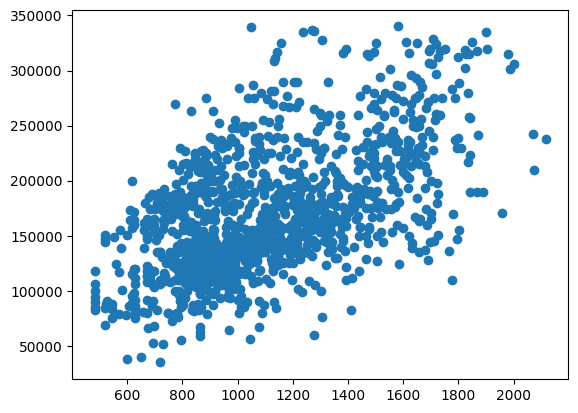

In [130]:
plt.scatter( train_data["1stFlrSF"], train_data["SalePrice"])

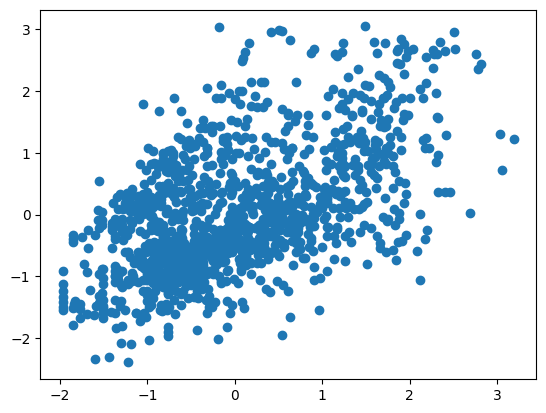

In [131]:
plt.scatter( df_scaled["1stFlrSF"], df_scaled["SalePrice"])

In [137]:
df_scaled.shape , train_data.shape

((1271, 19), (1271, 19))

In [142]:
df_scaled[significant_chi2_features] = train_data[significant_chi2_features].values

In [143]:
df_scaled

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType
0,0.699863,0.837450,0.715873,0.434283,0.504135,-0.540870,-0.789480,0.933099,1.373405,1.088611,3,0,5,0,5,13,2,0,1
1,0.219268,0.001316,-0.402682,0.434283,0.040739,0.707467,0.491918,0.933099,-0.176171,0.154758,3,0,24,0,2,8,0,0,1
2,0.966861,0.837450,0.905628,0.434283,0.820087,-0.344088,-0.587487,0.933099,-0.176171,1.019436,0,0,5,0,5,13,2,0,1
3,-0.519426,0.837450,0.733350,1.886844,0.999127,-0.848342,-0.458084,-0.973603,0.598617,-1.955058,0,0,6,0,5,15,0,2,5
4,1.438557,1.673585,1.934298,1.886844,2.020705,0.347724,0.122648,0.933099,2.148193,0.984849,0,0,15,0,5,13,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.103569,0.001316,0.558576,0.434283,0.040739,-0.242622,-0.483334,0.933099,0.598617,0.950262,3,0,8,0,5,13,5,0,1
1267,0.726563,0.001316,1.622202,0.434283,0.251374,1.568389,3.051559,0.933099,0.598617,0.223932,3,0,14,0,2,10,0,4,1
1268,1.732254,0.837450,2.288840,-1.018278,-1.054561,0.369247,0.258363,0.933099,2.148193,-1.055792,3,0,6,0,5,5,2,0,1
1269,-0.481601,-0.834819,-0.862088,-1.018278,-1.117752,0.141718,-0.088814,-0.973603,-0.950959,-0.744508,3,0,12,0,2,8,2,2,1


## Models for Regression

### 1)Linear Regression

In [144]:
X = df_scaled.drop(["SalePrice"],axis=1)
y = df_scaled["SalePrice"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
print(f"Train shape is {X_train.shape} Test_shape {X_test.shape}")
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_lr_pred = lr_model.predict(X_test)

Train shape is (953, 18) Test_shape (318, 18)


In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MSE =  mean_squared_error(y_test , y_lr_pred)
print("MSE of LinearRegression = ",MSE)
MAE = mean_absolute_error(y_test , y_lr_pred)
print("MAE of LinearRegression = " , MAE)
r2 = r2_score(y_test , y_lr_pred )
print("r2_score of LinearRegression = " , r2)

MSE of LinearRegression =  0.18110135948873146
MAE of LinearRegression =  0.31777425710726415
r2_score of LinearRegression =  0.8273669658632192


### 2)lasso Regresssor

In [46]:
from sklearn.linear_model import Ridge,  Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train)
lasso_y_pred = lasso_model.predict(X_test)

MSE =  mean_squared_error(y_test , lasso_y_pred)
print("MSE of lassoRegression = ",MSE)
MAE = mean_absolute_error(y_test , lasso_y_pred)
print("MAE of lassoRegression = " , MAE)
r2 = r2_score(y_test , lasso_y_pred )
print("r2_score of lassoRegression = " , r2)

MSE of lassoRegression =  0.1855564911012564
MAE of lassoRegression =  0.31748296391583525
r2_score of lassoRegression =  0.823120156839145


### 3)Ridge Regressor

In [145]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train,y_train)
ridge_y_pred = ridge_model.predict(X_test)

MSE =  mean_squared_error(y_test , ridge_y_pred)
print("MSE of RidgeRegression = ",MSE)
MAE = mean_absolute_error(y_test , ridge_y_pred)
print("MAE of RidgeRegression = " , MAE)
r2 = r2_score(y_test , ridge_y_pred )
print("r2_score of lassoRegression = " , r2)

MSE of RidgeRegression =  0.1697519808625358
MAE of RidgeRegression =  0.29568409416358216
r2_score of lassoRegression =  0.841067685943065


### Trees

In [151]:
from sklearn.tree import DecisionTreeRegressor  

 
# create a regressor object 
regressor = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

# Fitting the model
regressor.fit(X_train, y_train)
 
# Predict the model
xgb_y_pred = regressor.predict(X_test)
 
MSE =  mean_squared_error(y_test , xgb_y_pred)
print("MSE of XGBRegressor = ",MSE)
MAE = mean_absolute_error(y_test , xgb_y_pred)
print("MAE of XGBRegressor = " , MAE)
r2 = r2_score(y_test , xgb_y_pred )
print("r2_score of XGBRegressor = " , r2)

MSE of XGBRegressor =  0.30896105549177094
MAE of XGBRegressor =  0.4158772764453109
r2_score of XGBRegressor =  0.7107315316541473


In [161]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200,max_depth=10)
regressor.fit(X_train, y_train)
# Predict the model
xgb_y_pred = regressor.predict(X_test)
 
MSE =  mean_squared_error(y_test , xgb_y_pred)
print("MSE of XGBRegressor = ",MSE)
MAE = mean_absolute_error(y_test , xgb_y_pred)
print("MAE of XGBRegressor = " , MAE)
r2 = r2_score(y_test , xgb_y_pred )
print("r2_score of XGBRegressor = " , r2)

MSE of XGBRegressor =  0.17013108647231226
MAE of XGBRegressor =  0.2966738156849875
r2_score of XGBRegressor =  0.8407127438002542


In [155]:
# Feature importance
importances = regressor.feature_importances_
print("Feature Importances:", importances)

Feature Importances: [0.50545069 0.14692882 0.03497083 0.07802983 0.06043314 0.04308367
 0.00621875 0.00747983 0.03469477 0.00487474 0.00519751 0.01987157
 0.00308344 0.00361429 0.00791883 0.01113736 0.00426704 0.02274489]


### using support vector

##### Choosing the Kernel
The kernel function determines the shape of the decision boundary in the feature space. Different kernels suit different types of data:

**linear:**<br>
*Use When:* The data is linearly separable or can be well approximated by a linear model.
*Pros:* Simple and fast; no need to compute higher-dimensional spaces.
*Example:* Useful for data where relationships between features and target are approximately linear.

**poly (Polynomial Kernel):**<br>
*Use When:* Data is non-linear but can be approximated by polynomial relationships.
*Pros:* Can model more complex relationships than linear.
Hyperparameters: degree (degree of the polynomial), coef0 (independent term in the polynomial kernel function).
*Example:* Good for data where the relationship between features and target is polynomial.

**rbf (Radial Basis Function or Gaussian Kernel):**<br>
*Use When:* Data has non-linear relationships and you want to map data into a higher-dimensional space implicitly.
*Pros:* Highly flexible and can handle complex data distributions.
*Hyperparameters:* gamma (defines how far the influence of a single training example reaches).
*Example:* Suitable for data with complex boundaries.

**sigmoid:**<br>
*Use When:* You want to model the data with a function similar to a neural network's activation function.
*Pros:* Can capture complex relationships but is less common in practice.
*Example:* Sometimes used for experimentation.

##### Choosing the Regularization Parameter (C)
The C parameter controls the trade-off between achieving a low error on the training data and minimizing the model complexity:

**High C:**
Effect: Lowers the margin and tries to fit the training data as well as possible.
Risk: Can lead to overfitting if too high because the model may become too complex and capture noise in the training data.
Use When: You have a large amount of data and want to minimize training error.
**Low C:**

Effect: Increases the margin, allowing some errors on the training data.
Risk: Can lead to underfitting if too low because the model may be too simple.
Use When: You want to ensure a more generalized model and have a smaller dataset.

##### Choosing the Epsilon (epsilon)
The epsilon parameter defines the margin of tolerance where no penalty is given for errors:

**Low epsilon:**

Effect: Strict margin of tolerance, leading to a smaller tube around the regression function.
Risk: Can increase the risk of overfitting by forcing the model to fit training data more closely.
Use When: You want to closely fit the data.\

**High epsilon:**

Effect: Larger margin of tolerance, allowing more errors without penalty.
Risk: May underfit if too high because the model is too relaxed.
Use When: You want to be less sensitive to small errors and potentially improve generalization.

In [173]:
from sklearn.svm import SVR
# Initialize the Support Vector Regressor
svr_regressor = SVR(kernel='rbf', C=10.0, epsilon=0.1)

svr_regressor.fit(X_train, y_train)
# Predict the model
xgb_y_pred = svr_regressor.predict(X_test)
 
MSE =  mean_squared_error(y_test , xgb_y_pred)
print("MSE of XGBRegressor = ",MSE)
MAE = mean_absolute_error(y_test , xgb_y_pred)
print("MAE of XGBRegressor = " , MAE)
r2 = r2_score(y_test , xgb_y_pred )
print("r2_score of XGBRegressor = " , r2)

MSE of XGBRegressor =  0.14239796371835994
MAE of XGBRegressor =  0.27263124875430406
r2_score of XGBRegressor =  0.8666782103174314


### Hyperparameter tuning

In [174]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf' kernel
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Quize Try on the following dataset

In [ ]:
https://www.kaggle.com/datasets/sidharth178/car-prices-dataset?select=train.csv

# Classification

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_task1/main/Iris.csv")

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


In [5]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [7]:

# Missing Values/Null Values Count
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:

# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [10]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [11]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [12]:
# New updated dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


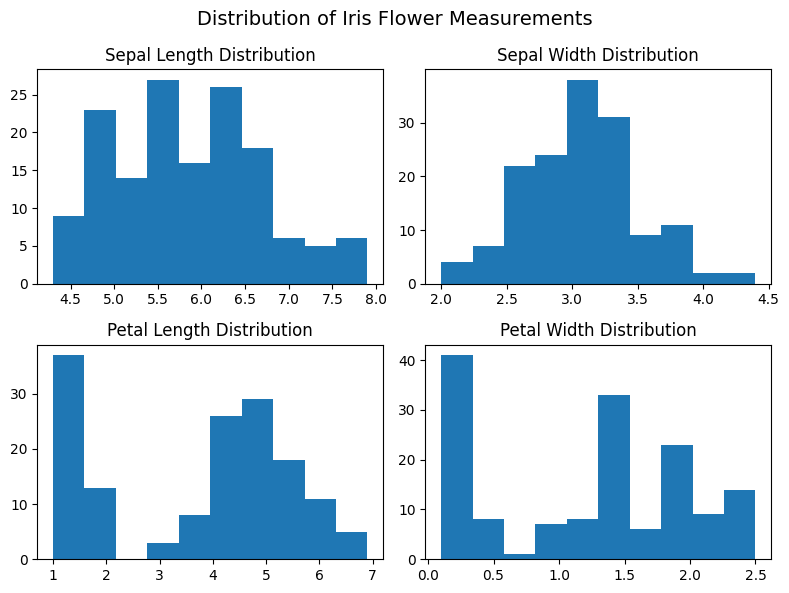

In [13]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

### Sepal Length vs Sepal Width

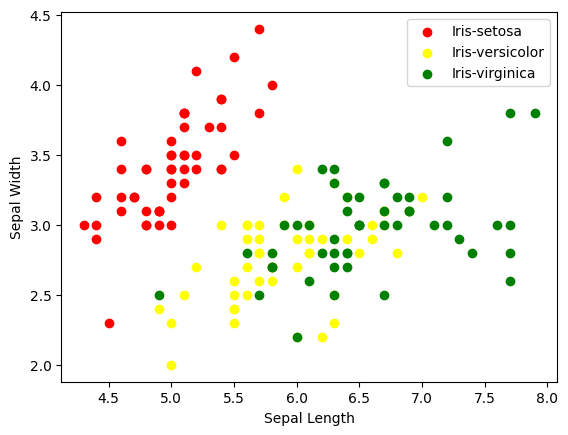

In [14]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Petal Length vs Petal Width

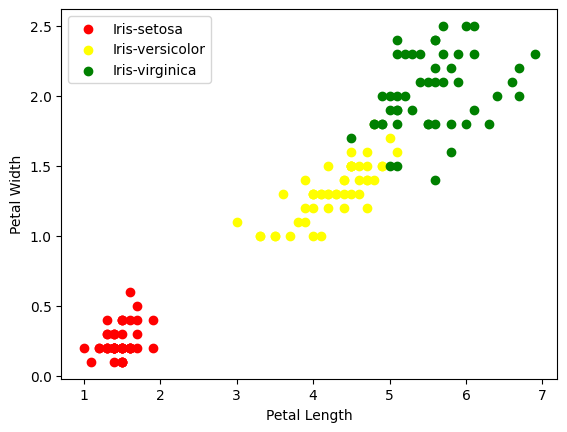

In [15]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Sepal Length vs Petal Length

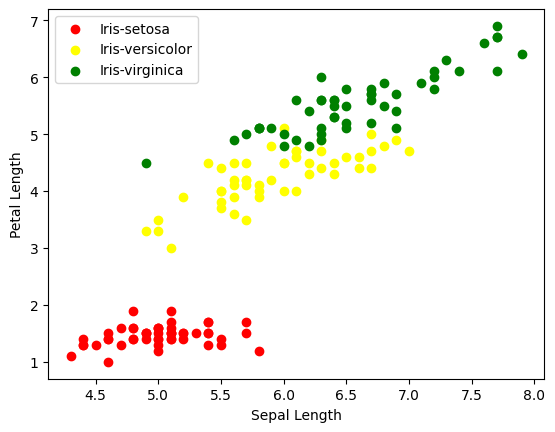

In [16]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     


### Sepal Width vs Petal Width

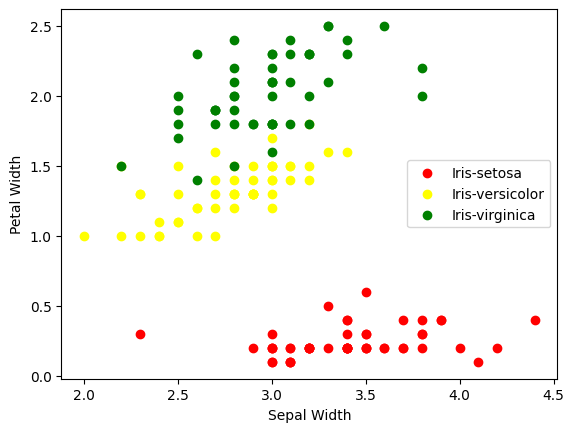

In [17]:
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Heatmap

In [19]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the categorical data
data['Species_encoded'] = label_encoder.fit_transform(data['Species'])

In [22]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [23]:
encoded_data = data.drop(columns = ['Species'])
encoded_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


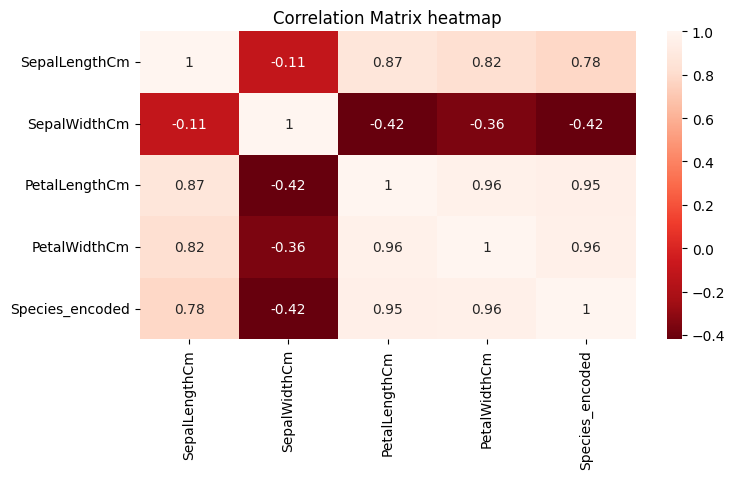

In [24]:
# Correlation Heatmap Visualization Code
corr_matrix = encoded_data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()
     

In [25]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [26]:
# Defining the X and y
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [27]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [28]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Species
1    37
0    35
2    33
Name: count, dtype: int64

In [ ]:
"""macro avg calculates the metric independently for each class and then computes the average of these metrics. 
It does not take into account the class imbalance, meaning that every class is weighted equally, 
regardless of how many instances each class has in the dataset."""

In [ ]:
!pip install tabulate

In [35]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [36]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


In [37]:

# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


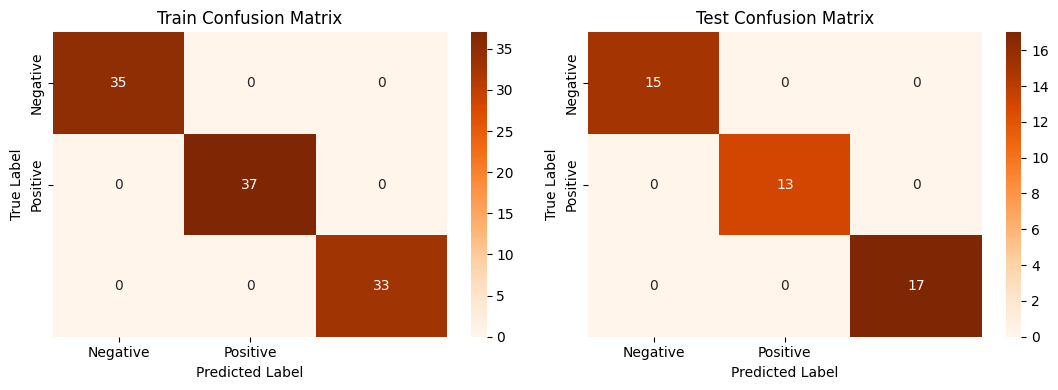


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        17 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [38]:

# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [39]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,1.0
Precision Test,1.0
Recall Train,1.0
Recall Test,1.0
Accuracy Train,1.0
Accuracy Test,1.0
F1 macro Train,1.0
F1 macro Test,1.0



Confusion Matrix:


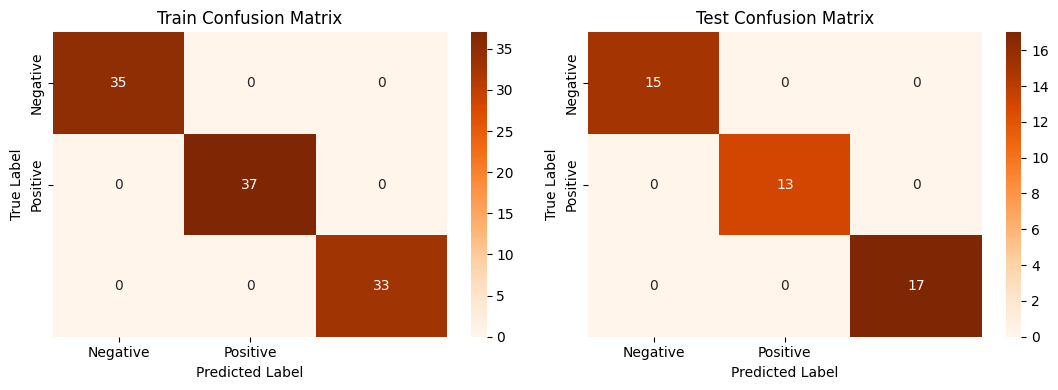


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        17 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

,Logistic regression,Decision Tree
Precision Train,1.0,1.0
Precision Test,1.0,1.0
Recall Train,1.0,1.0
Recall Test,1.0,1.0
Accuracy Train,1.0,1.0
Accuracy Test,1.0,1.0
F1 macro Train,1.0,1.0
F1 macro Test,1.0,1.0


In [40]:

# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score


Confusion Matrix:


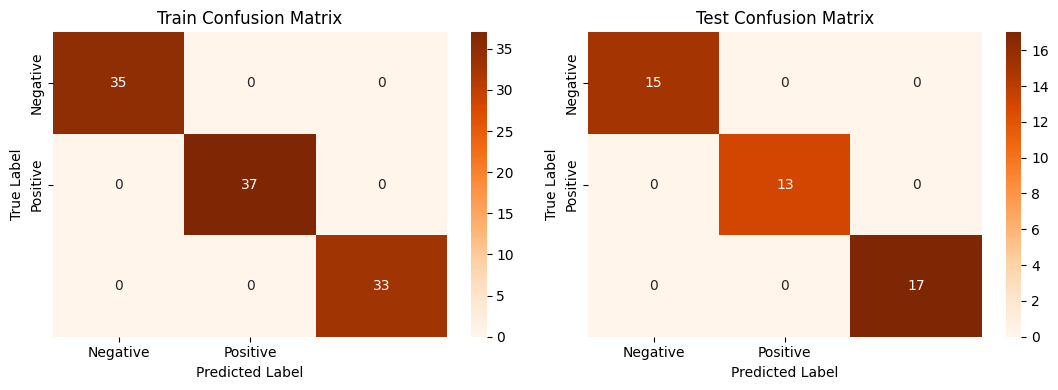


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        17 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

,Logistic regression,Decision Tree,Random Forest
Precision Train,1.0,1.0,1.0
Precision Test,1.0,1.0,1.0
Recall Train,1.0,1.0,1.0
Recall Test,1.0,1.0,1.0
Accuracy Train,1.0,1.0,1.0
Accuracy Test,1.0,1.0,1.0
F1 macro Train,1.0,1.0,1.0
F1 macro Test,1.0,1.0,1.0


In [41]:
# ML Model - 3 Implementation 
rf_model = RandomForestClassifier(random_state=0)
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score


Confusion Matrix:


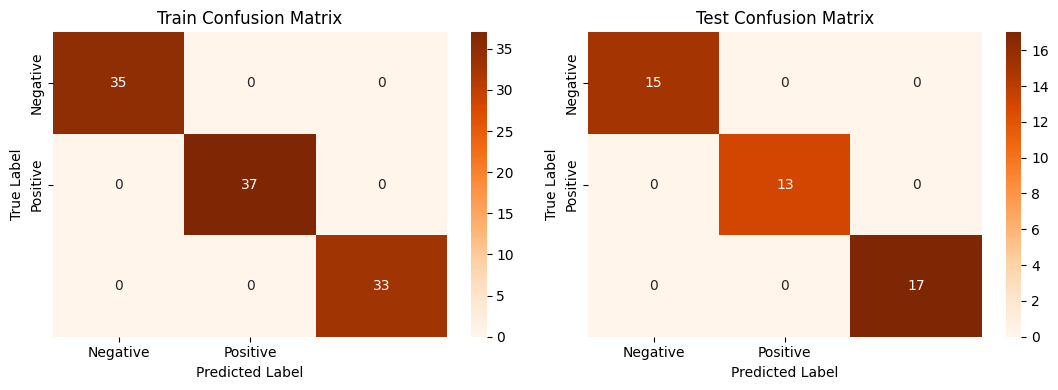


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        17 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

,Logistic regression,Decision Tree,Random Forest,SVM
Precision Train,1.0,1.0,1.0,1.0
Precision Test,1.0,1.0,1.0,1.0
Recall Train,1.0,1.0,1.0,1.0
Recall Test,1.0,1.0,1.0,1.0
Accuracy Train,1.0,1.0,1.0,1.0
Accuracy Test,1.0,1.0,1.0,1.0
F1 macro Train,1.0,1.0,1.0,1.0
F1 macro Test,1.0,1.0,1.0,1.0


In [42]:
# ML Model - 4 Implementation 
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model 

# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score


Confusion Matrix:


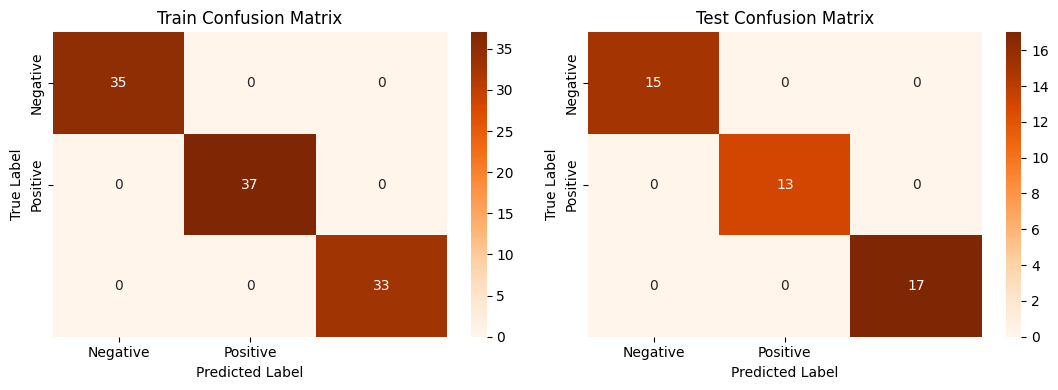


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        17 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

,Logistic regression,Decision Tree,Random Forest,SVM,Naive Bayes
Precision Train,1.0,1.0,1.0,1.0,1.0
Precision Test,1.0,1.0,1.0,1.0,1.0
Recall Train,1.0,1.0,1.0,1.0,1.0
Recall Test,1.0,1.0,1.0,1.0,1.0
Accuracy Train,1.0,1.0,1.0,1.0,1.0
Accuracy Test,1.0,1.0,1.0,1.0,1.0
F1 macro Train,1.0,1.0,1.0,1.0,1.0
F1 macro Test,1.0,1.0,1.0,1.0,1.0


In [43]:

# ML Model - 6 Implementation
nb_model = GaussianNB()

# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score
     